In [2]:
import tensorflow as tf
print(tf.__version__)

import matplotlib.pylab as plt

import tensorflow_hub as hub
import tensorflow_datasets as tfds

from tensorflow.keras import layers

import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

import numpy as np
import PIL.Image as Image
from keras.preprocessing import image

2.5.0-dev20201217


In [3]:
model = tf.keras.models.load_model('C:/Users/Lukas/Desktop/commaai-speed-challenge/1-classify-frames/model_classify_frames_v2.h5')


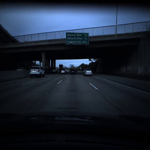

In [5]:
img = Image.open("C:/Users/Lukas/Desktop/commaai-speed-challenge/data/frames/0.jpg")
img = img.resize((150,150))
img

In [6]:
img = np.array(img)/255.0
img.shape

(150, 150, 3)

In [7]:
result = model.predict(img[np.newaxis, ...])
result.shape

ValueError: in user code:

    C:\Users\Lukas\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1513 predict_function  *
        return step_function(self, iterator)
    C:\Users\Lukas\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1503 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\Users\Lukas\anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1263 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\Lukas\anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2735 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\Lukas\anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:3424 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Users\Lukas\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1496 run_step  **
        outputs = model.predict_step(data)
    C:\Users\Lukas\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1469 predict_step
        return self(x, training=False)
    C:\Users\Lukas\anaconda3\lib\site-packages\tensorflow\python\keras\engine\base_layer.py:1004 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    C:\Users\Lukas\anaconda3\lib\site-packages\tensorflow\python\keras\engine\input_spec.py:255 assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer sequential_1 is incompatible with the layer: expected axis -1 of input shape to have value 8192 but received input with shape (None, 150, 150, 3)


In [ ]:
predicted_class = np.argmax(result[0], axis=-1)
predicted_class